# Wave Equations in Seismology

<a target="_blank" href="https://colab.research.google.com/github/AI4EPS/EPS130_Seismology/blob/main/notebooks/wave_equation_lecture.ipynb">
<img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  

In this notebook, we will explore the fundamental wave equations that govern seismic wave propagation through the Earth. We'll learn about P-waves and S-waves, understand the mathematical solutions to wave equations, and use real earthquake data to demonstrate key wave properties.

In [ ]:
# Install dependencies (run this cell first on Google Colab)
!pip install obspy -q

## 1. The Elastic Wave Equation

When an earthquake occurs, it generates seismic waves that propagate through the Earth. These waves are governed by the **elastic wave equation**, which describes how displacement propagates through an elastic medium.

### The General Form

For an isotropic, homogeneous elastic medium, the wave equation is:

$$\rho \frac{\partial^2 \mathbf{u}}{\partial t^2} = (\lambda + 2\mu) \nabla(\nabla \cdot \mathbf{u}) - \mu \nabla \times (\nabla \times \mathbf{u})$$

Where:
- $\mathbf{u}$ = displacement vector
- $\rho$ = density of the medium
- $\lambda$ = Lamé's first parameter
- $\mu$ = shear modulus (Lamé's second parameter)

### Understanding the Elastic Moduli

| Parameter | Symbol | Physical Meaning |
|-----------|--------|------------------|
| Lamé's first parameter | $\lambda$ | Relates to incompressibility |
| Shear modulus | $\mu$ | Resistance to shearing |
| Bulk modulus | $K = \lambda + \frac{2}{3}\mu$ | Resistance to compression |

## 2. P-Waves and S-Waves

The elastic wave equation admits two types of body wave solutions:

### P-Waves (Primary/Compressional Waves)

P-waves are **longitudinal waves** where particle motion is parallel to the direction of wave propagation.

**P-wave velocity:**
$$V_P = \sqrt{\frac{\lambda + 2\mu}{\rho}} = \sqrt{\frac{K + \frac{4}{3}\mu}{\rho}}$$

**Key characteristics:**
- Fastest seismic waves (arrive first, hence "Primary")
- Can travel through solids, liquids, and gases
- Cause compression and dilation

### S-Waves (Secondary/Shear Waves)

S-waves are **transverse waves** where particle motion is perpendicular to the direction of wave propagation.

**S-wave velocity:**
$$V_S = \sqrt{\frac{\mu}{\rho}}$$

**Key characteristics:**
- Slower than P-waves (arrive second, hence "Secondary")
- Can only travel through solids (liquids have $\mu = 0$)
- Cause shearing deformation

### The Vp/Vs Ratio

The ratio of P-wave to S-wave velocity is:
$$\frac{V_P}{V_S} = \sqrt{\frac{\lambda + 2\mu}{\mu}}$$

For a Poisson solid ($\lambda = \mu$): $V_P/V_S = \sqrt{3} \approx 1.73$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate wave velocities for typical crustal rocks
# Granite example
rho = 2700  # kg/m^3 (density)
mu = 30e9   # Pa (shear modulus)
lam = 30e9  # Pa (Lamé's first parameter)

Vp = np.sqrt((lam + 2*mu) / rho)
Vs = np.sqrt(mu / rho)

print(f"For granite (ρ = {rho} kg/m³, λ = {lam/1e9:.0f} GPa, μ = {mu/1e9:.0f} GPa):")
print(f"  P-wave velocity: Vp = {Vp/1000:.2f} km/s")
print(f"  S-wave velocity: Vs = {Vs/1000:.2f} km/s")
print(f"  Vp/Vs ratio: {Vp/Vs:.2f}")

For granite (ρ = 2700 kg/m³, λ = 30 GPa, μ = 30 GPa):
  P-wave velocity: Vp = 5.77 km/s
  S-wave velocity: Vs = 3.33 km/s
  Vp/Vs ratio: 1.73


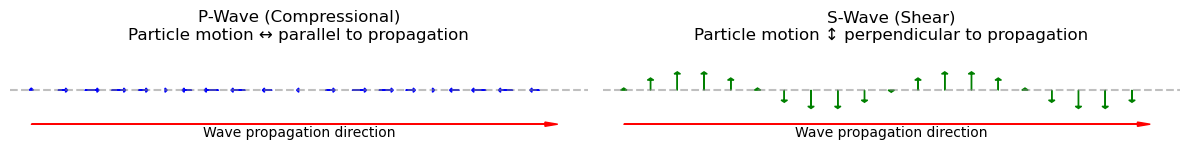

In [15]:
# Visualize P-wave and S-wave particle motion
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# P-wave: particle motion parallel to propagation
ax1 = axes[0]
x = np.linspace(0, 4*np.pi, 100)
y = np.zeros_like(x)
# Show compression and dilation
for i in range(20):
    x_pos = i * 4*np.pi/20
    displacement = 0.3 * np.sin(x_pos)
    ax1.arrow(x_pos, 0, displacement, 0, head_width=0.1, head_length=0.05, fc='blue', ec='blue')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.arrow(0, -0.8, 4*np.pi-0.5, 0, head_width=0.1, head_length=0.3, fc='red', ec='red')
ax1.text(4*np.pi/2, -1.1, 'Wave propagation direction', ha='center', fontsize=10)
ax1.set_xlim(-0.5, 4*np.pi+0.5)
ax1.set_ylim(-1.5, 1)
ax1.set_title('P-Wave (Compressional)\nParticle motion ↔ parallel to propagation', fontsize=12)
ax1.set_aspect('equal')
ax1.axis('off')

# S-wave: particle motion perpendicular to propagation
ax2 = axes[1]
for i in range(20):
    x_pos = i * 4*np.pi/20
    displacement = 0.4 * np.sin(x_pos)
    ax2.arrow(x_pos, 0, 0, displacement, head_width=0.15, head_length=0.05, fc='green', ec='green')
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.arrow(0, -0.8, 4*np.pi-0.5, 0, head_width=0.1, head_length=0.3, fc='red', ec='red')
ax2.text(4*np.pi/2, -1.1, 'Wave propagation direction', ha='center', fontsize=10)
ax2.set_xlim(-0.5, 4*np.pi+0.5)
ax2.set_ylim(-1.5, 1)
ax2.set_title('S-Wave (Shear)\nParticle motion ↕ perpendicular to propagation', fontsize=12)
ax2.set_aspect('equal')
ax2.axis('off')

plt.tight_layout()
plt.show()

## 3. The 1D Wave Equation and Its Solution

For a one-dimensional wave propagating in the x-direction, the wave equation simplifies to:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

Where $c$ is the wave speed ($V_P$ or $V_S$ depending on the wave type).

### D'Alembert's Solution

The general solution is:
$$u(x, t) = f(x - ct) + g(x + ct)$$

This represents:
- $f(x - ct)$: A wave traveling in the **+x direction**
- $g(x + ct)$: A wave traveling in the **-x direction**

### Harmonic Wave Solution

A particularly important solution is the **harmonic (sinusoidal) wave**:

$$u(x, t) = A \cos(kx - \omega t + \phi)$$

Or in complex notation:
$$u(x, t) = A e^{i(kx - \omega t)}$$

In [16]:
# Demonstrate wave propagation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Wave parameters
A = 1.0      # Amplitude
c = 5.0      # Wave speed (km/s)
f = 1.0      # Frequency (Hz)
omega = 2 * np.pi * f  # Angular frequency
k = omega / c          # Wave number
wavelength = 2 * np.pi / k  # Wavelength

print(f"Wave parameters:")
print(f"  Frequency: f = {f} Hz")
print(f"  Wave speed: c = {c} km/s")
print(f"  Wavelength: λ = {wavelength:.2f} km")
print(f"  Wave number: k = {k:.3f} rad/km")
print(f"  Angular frequency: ω = {omega:.3f} rad/s")

Wave parameters:
  Frequency: f = 1.0 Hz
  Wave speed: c = 5.0 km/s
  Wavelength: λ = 5.00 km
  Wave number: k = 1.257 rad/km
  Angular frequency: ω = 6.283 rad/s


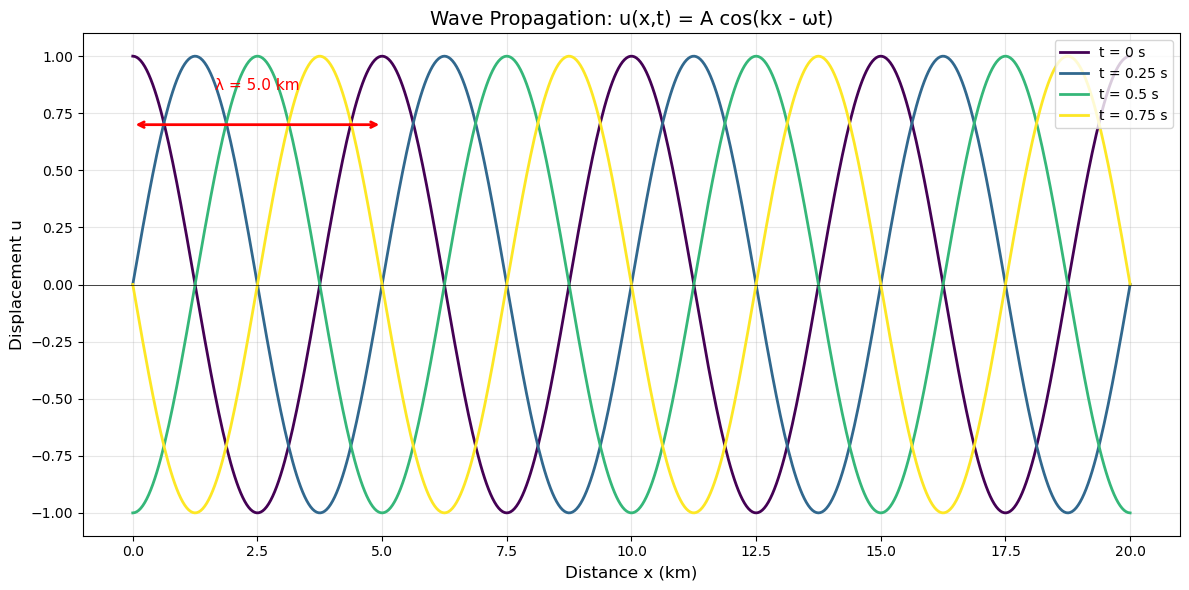

In [17]:
# Static visualization of wave at different times
x = np.linspace(0, 20, 500)  # km
times = [0, 0.25, 0.5, 0.75]  # seconds

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(times)))

for t, color in zip(times, colors):
    u = A * np.cos(k * x - omega * t)
    ax.plot(x, u, color=color, linewidth=2, label=f't = {t} s')

ax.set_xlabel('Distance x (km)', fontsize=12)
ax.set_ylabel('Displacement u', fontsize=12)
ax.set_title('Wave Propagation: u(x,t) = A cos(kx - ωt)', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Mark wavelength
ax.annotate('', xy=(wavelength, 0.7), xytext=(0, 0.7),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(wavelength/2, 0.85, f'λ = {wavelength:.1f} km', ha='center', fontsize=11, color='red')

plt.tight_layout()
plt.show()

## 4. Important Wave Properties

Understanding these fundamental properties is essential for analyzing seismic waves:

| Property | Symbol | Definition | Units |
|----------|--------|------------|-------|
| **Period** | $T$ | Time for one complete oscillation | seconds (s) |
| **Frequency** | $f = 1/T$ | Number of oscillations per second | Hertz (Hz) |
| **Angular frequency** | $\omega = 2\pi f$ | Rate of phase change | radians/second |
| **Wavelength** | $\lambda$ | Spatial distance for one complete cycle | meters (m) or km |
| **Wave number** | $k = 2\pi/\lambda$ | Spatial frequency | radians/meter |
| **Wave speed** | $c = f\lambda = \omega/k$ | Propagation velocity | m/s or km/s |
| **Amplitude** | $A$ | Maximum displacement | m or other units |

### The Fundamental Relationship

$$c = f \cdot \lambda = \frac{\omega}{k}$$

This equation connects the temporal properties (frequency) with spatial properties (wavelength) through the wave speed.

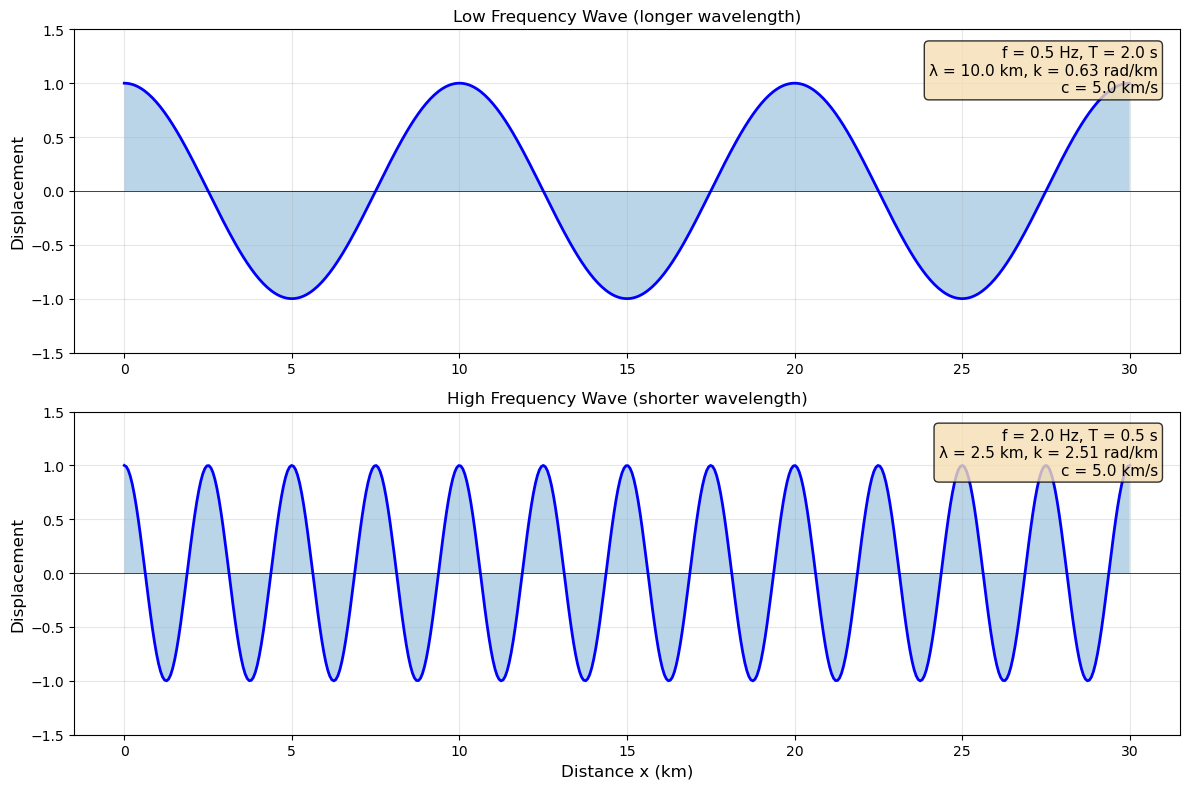

Key observation: At constant wave speed, higher frequency = shorter wavelength


In [18]:
# Interactive demonstration of wave properties
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Parameters
f1, f2 = 0.5, 2.0  # Two different frequencies
c = 5.0  # Same wave speed

x = np.linspace(0, 30, 500)
t = 0

for ax, freq in zip(axes, [f1, f2]):
    omega = 2 * np.pi * freq
    k = omega / c
    wavelength = c / freq
    period = 1 / freq
    
    u = np.cos(k * x - omega * t)
    ax.plot(x, u, 'b-', linewidth=2)
    ax.fill_between(x, u, alpha=0.3)
    
    ax.set_ylabel('Displacement', fontsize=12)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    
    # Add annotations
    props = f"f = {freq} Hz, T = {period} s\nλ = {wavelength:.1f} km, k = {k:.2f} rad/km\nc = {c} km/s"
    ax.text(0.98, 0.95, props, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

axes[0].set_title('Low Frequency Wave (longer wavelength)', fontsize=12)
axes[1].set_title('High Frequency Wave (shorter wavelength)', fontsize=12)
axes[1].set_xlabel('Distance x (km)', fontsize=12)

plt.tight_layout()
plt.show()

print("Key observation: At constant wave speed, higher frequency = shorter wavelength")

## 5. Real Earthquake Data with ObsPy

Now let's apply what we've learned to real seismic data! We'll use ObsPy to:
1. Find a recent Northern California earthquake
2. Download waveforms and identify P and S waves
3. Explore how different frequency filters reveal different wave characteristics

In [19]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Initialize the NCEDC client (Northern California Earthquake Data Center)
client = Client("NCEDC")

# Search for recent Northern California earthquakes (M4.5+)
starttime = UTCDateTime() - 365 * 24 * 3600  # Past year
endtime = UTCDateTime()

print("Searching for recent Northern California earthquakes...")
catalog = client.get_events(
    starttime=starttime,
    endtime=endtime,
    minlatitude=35,
    maxlatitude=42,
    minlongitude=-125,
    maxlongitude=-118,
    minmagnitude=4.5,
    orderby="magnitude"
)

print(f"Found {len(catalog)} earthquakes\n")
print("Largest events:")
for i, event in enumerate(catalog[:5]):
    origin = event.origins[0]
    mag = event.magnitudes[0]
    print(f"  [{i}] M{mag.mag:.1f} - {origin.time.strftime('%Y-%m-%d %H:%M:%S')} - "
          f"Lat: {origin.latitude:.2f}, Lon: {origin.longitude:.2f}")

Searching for recent Northern California earthquakes...
Found 3 earthquakes

Largest events:
  [0] M4.9 - 2025-12-31 05:49:31 - Lat: 40.54, Lon: -120.68
  [1] M4.7 - 2025-12-29 00:41:14 - Lat: 40.55, Lon: -120.70
  [2] M4.6 - 2025-05-26 08:17:57 - Lat: 40.27, Lon: -124.64


In [20]:
# =============================================================================
# SELECT YOUR EARTHQUAKE HERE
# Change event_index to explore different earthquakes from the list above
# =============================================================================
event_index = 0

event = catalog[event_index]
origin = event.origins[0]
magnitude = event.magnitudes[0]

print(f"Selected earthquake:")
print(f"  Origin time: {origin.time}")
print(f"  Location: {origin.latitude:.3f}°N, {origin.longitude:.3f}°W")
print(f"  Depth: {origin.depth/1000:.1f} km")
print(f"  Magnitude: M{magnitude.mag:.1f}")

eq_lat = origin.latitude
eq_lon = origin.longitude
eq_time = origin.time

Selected earthquake:
  Origin time: 2025-12-31T05:49:31.910000Z
  Location: 40.542°N, -120.684°W
  Depth: 5.0 km
  Magnitude: M4.9


In [21]:
# Find available stations near the earthquake
from obspy.geodetics import gps2dist_azimuth

print("Searching for nearby stations (BK and NC networks)...")
inventory = client.get_stations(
    network="BK,NC",  # Berkeley and Northern California networks
    channel="BHZ,HHZ",  # Broadband or high-rate, vertical component
    starttime=eq_time,
    endtime=eq_time + 300,
    latitude=eq_lat,
    longitude=eq_lon,
    maxradius=3,  # degrees (~330 km)
    level="channel"
)

# Calculate distances for all stations
stations_info = []
for network in inventory:
    for station in network:
        for channel in station:
            dist_m, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            dist_km = dist_m / 1000
            stations_info.append({
                'network': network.code,
                'station': station.code,
                'channel': channel.code,
                'latitude': station.latitude,
                'longitude': station.longitude,
                'distance_km': dist_km
            })

# Remove duplicates (keep first channel type per station)
seen = set()
unique_stations = []
for sta in sorted(stations_info, key=lambda x: x['distance_km']):
    key = f"{sta['network']}.{sta['station']}"
    if key not in seen:
        seen.add(key)
        unique_stations.append(sta)

print(f"Found {len(unique_stations)} unique stations")

# Select stations closest to target distances: 25, 50, 75, 100, 125, 150, 175, 200 km
target_distances = [25, 50, 75, 100, 125, 150, 175, 200]

selected_stations = []
for target in target_distances:
    # Find station closest to this target distance
    best = min(unique_stations, key=lambda s: abs(s['distance_km'] - target))
    # Only add if within 30 km of target and not already selected
    if abs(best['distance_km'] - target) < 30 and best not in selected_stations:
        selected_stations.append(best)

print(f"\nSelected {len(selected_stations)} stations at target distances:")
for sta in selected_stations:
    print(f"  {sta['network']}.{sta['station']:5s} - {sta['distance_km']:6.1f} km")

Searching for nearby stations (BK and NC networks)...
Found 175 unique stations

Selected 8 stations at target distances:
  NC.LCL   -   32.2 km
  BK.LITV  -   48.8 km
  NC.LDH   -   76.1 km
  BK.PWAY  -   98.8 km
  BK.LCOW  -  127.6 km
  NC.LBR   -  151.1 km
  BK.SUTB  -  173.6 km
  BK.GASB  -  199.3 km


In [22]:
# Download waveforms from all selected stations
from obspy import Stream

streams = []
print("Downloading waveforms...")

for sta in selected_stations:
    try:
        st = client.get_waveforms(
            network=sta['network'],
            station=sta['station'],
            location="*",
            channel=sta['channel'],
            starttime=eq_time - 10,
            endtime=eq_time + 120
        )
        st.merge(fill_value=0)
        streams.append((st[0], sta))
        print(f"  {sta['network']}.{sta['station']:5s} ({sta['distance_km']:5.1f} km) - OK")
    except Exception as e:
        print(f"  {sta['network']}.{sta['station']:5s} ({sta['distance_km']:5.1f} km) - Failed")

print(f"\nSuccessfully downloaded {len(streams)} waveforms")

  NC.LCL   ( 32.2 km) - OK
  BK.LITV  ( 48.8 km) - OK
  NC.LDH   ( 76.1 km) - OK
  BK.PWAY  ( 98.8 km) - OK
  BK.LCOW  (127.6 km) - OK
  NC.LBR   (151.1 km) - OK
  BK.SUTB  (173.6 km) - OK
  BK.GASB  (199.3 km) - OK

Successfully downloaded 8 waveforms


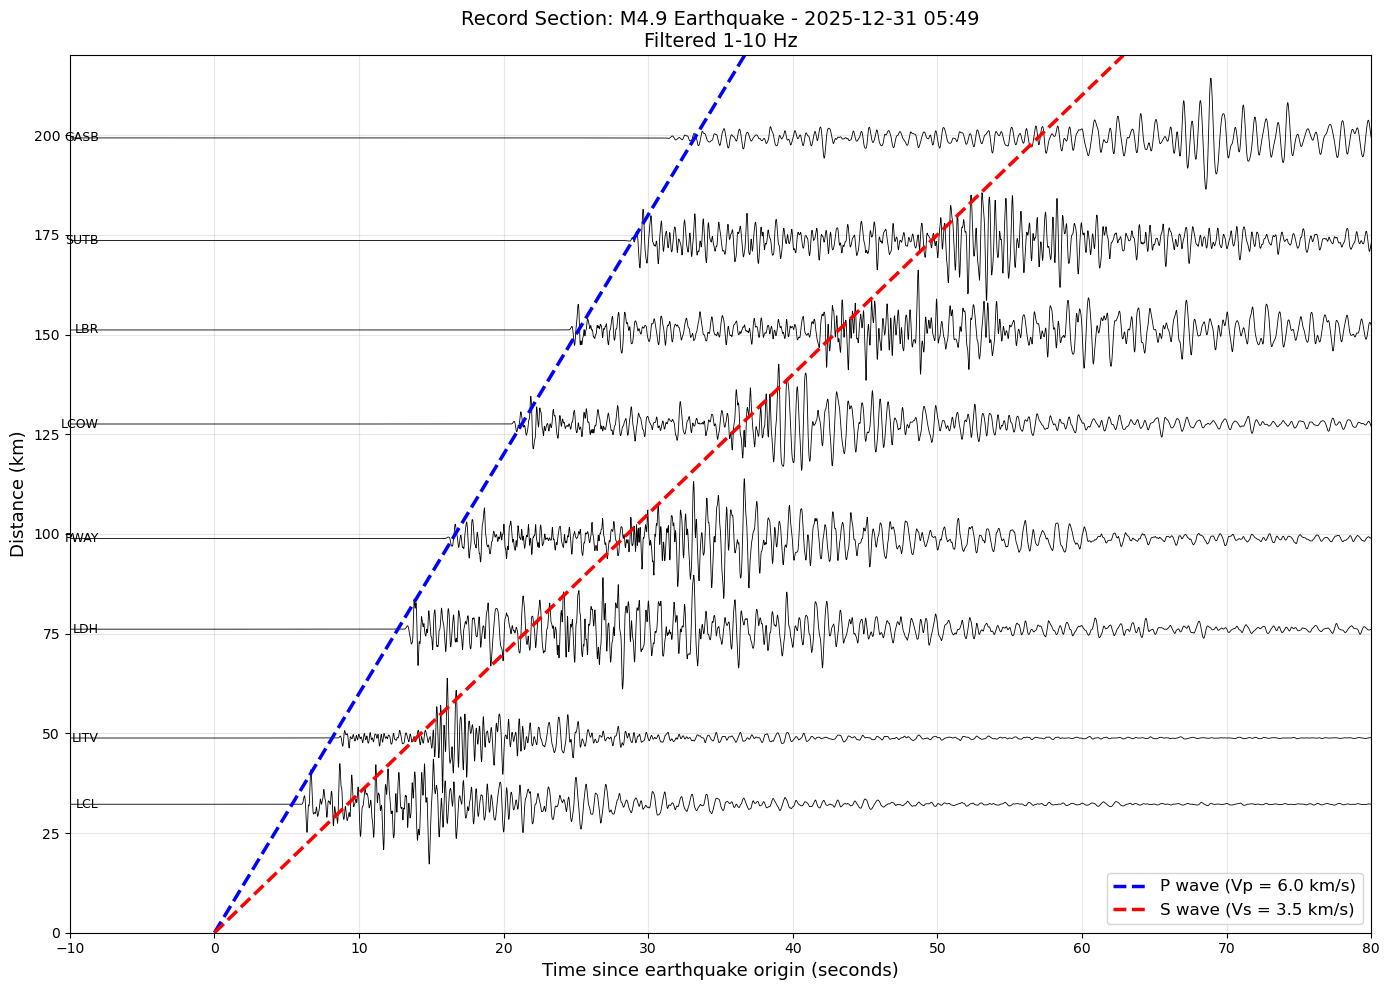

Observations:
  - P waves (blue line) arrive first at all distances
  - S waves (red line) arrive later, with increasing delay at greater distances
  - The slopes of these lines represent the wave velocities (steeper = slower)


In [23]:
# =============================================================================
# RECORD SECTION: Waveforms at multiple distances showing P and S wave move-out
# =============================================================================

# Typical crustal velocities
Vp_avg = 6.0  # km/s
Vs_avg = 3.5  # km/s

fig, ax = plt.subplots(figsize=(14, 10))

# Sort streams by distance
streams_sorted = sorted(streams, key=lambda x: x[1]['distance_km'])

# Normalize and plot each waveform
for tr, sta in streams_sorted:
    tr_plot = tr.copy()
    tr_plot.detrend('demean')
    tr_plot.filter('bandpass', freqmin=1, freqmax=10)
    
    # Time relative to origin
    times = tr_plot.times() + (tr_plot.stats.starttime - eq_time)
    
    # Normalize amplitude and scale for plotting
    data_norm = tr_plot.data / np.max(np.abs(tr_plot.data)) * 15  # Scale factor for visibility
    
    # Plot waveform at its distance
    dist = sta['distance_km']
    ax.plot(times, data_norm + dist, 'k-', linewidth=0.6)
    ax.text(-8, dist, f"{sta['station']}", fontsize=9, va='center', ha='right')

# Plot P and S wave travel time curves
distances_curve = np.linspace(0, 220, 100)
t_P_curve = distances_curve / Vp_avg
t_S_curve = distances_curve / Vs_avg

ax.plot(t_P_curve, distances_curve, 'b--', linewidth=2.5, label=f'P wave (Vp = {Vp_avg} km/s)')
ax.plot(t_S_curve, distances_curve, 'r--', linewidth=2.5, label=f'S wave (Vs = {Vs_avg} km/s)')

ax.set_xlabel('Time since earthquake origin (seconds)', fontsize=13)
ax.set_ylabel('Distance (km)', fontsize=13)
ax.set_title(f'Record Section: M{magnitude.mag:.1f} Earthquake - {origin.time.strftime("%Y-%m-%d %H:%M")}\n'
             f'Filtered 1-10 Hz', fontsize=14)
ax.set_xlim(-10, 80)
ax.set_ylim(0, 220)
ax.legend(loc='lower right', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("  - P waves (blue line) arrive first at all distances")
print("  - S waves (red line) arrive later, with increasing delay at greater distances")
print("  - The slopes of these lines represent the wave velocities (steeper = slower)")

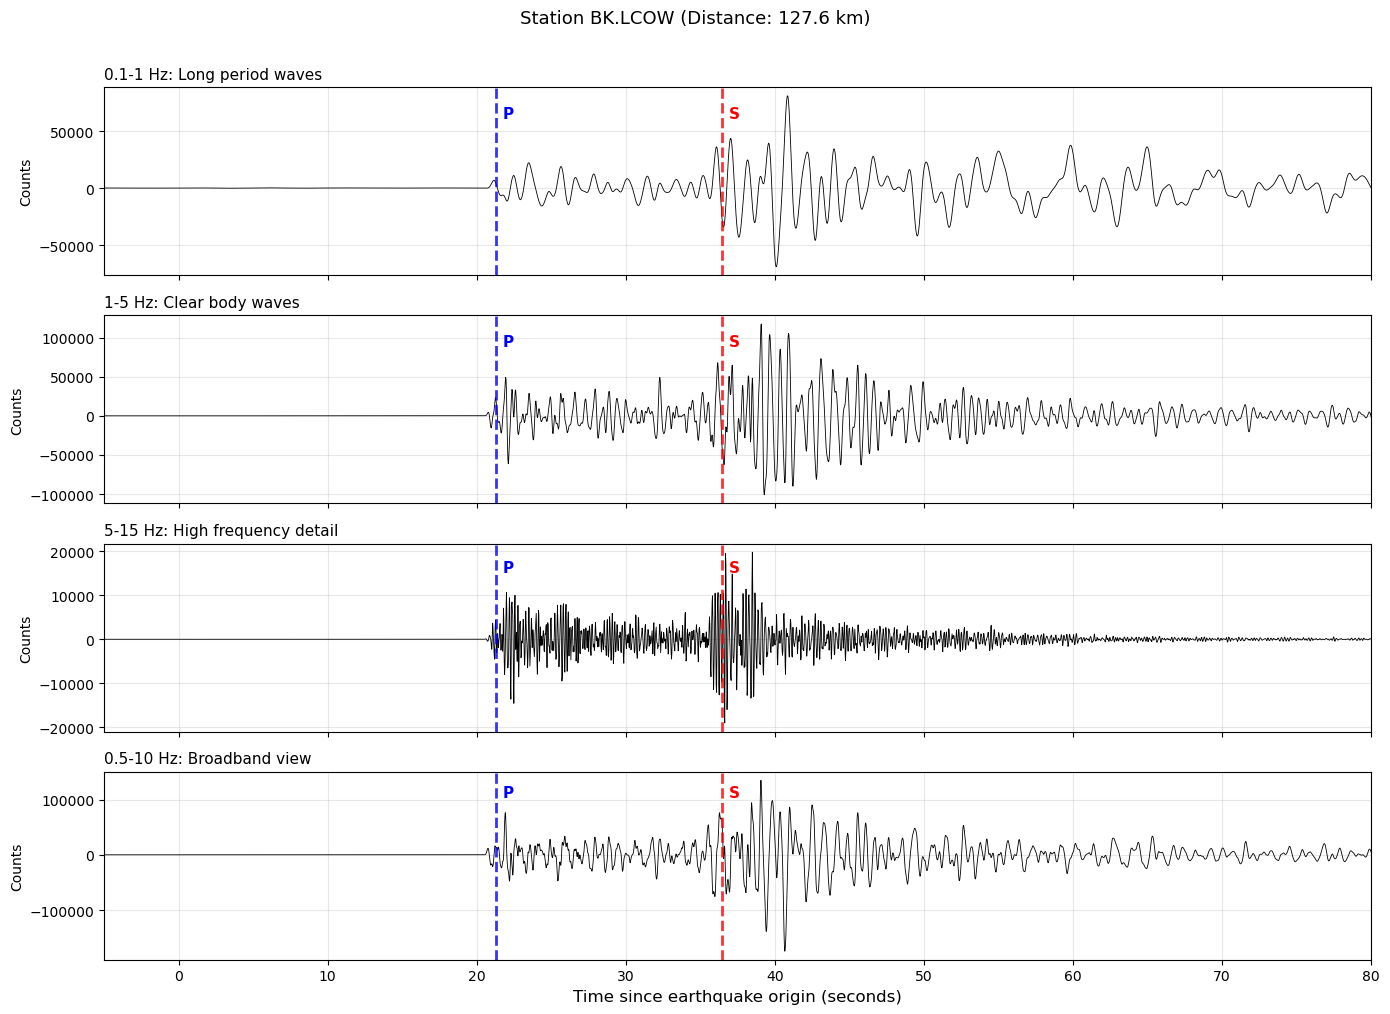

Key observations:
  - Low frequencies (0.1-1 Hz): Shows long-period surface waves
  - Mid frequencies (1-5 Hz): Clearest P and S wave arrivals
  - High frequencies (5-15 Hz): More detail but also more noise


In [24]:
# =============================================================================
# EFFECT OF BANDPASS FILTERING ON WAVEFORMS
# Using one station to demonstrate how different frequency bands reveal different features
# =============================================================================

# Use a mid-distance station for demonstration
demo_idx = len(streams_sorted) // 2
tr_demo, sta_demo = streams_sorted[demo_idx]
dist_demo = sta_demo['distance_km']

# Expected arrival times for this station
t_P_demo = dist_demo / Vp_avg
t_S_demo = dist_demo / Vs_avg

# Define different bandpass filter ranges
filter_bands = [
    (0.1, 1.0, "0.1-1 Hz: Long period waves"),
    (1.0, 5.0, "1-5 Hz: Clear body waves"),
    (5.0, 15.0, "5-15 Hz: High frequency detail"),
    (0.5, 10.0, "0.5-10 Hz: Broadband view"),
]

fig, axes = plt.subplots(len(filter_bands), 1, figsize=(14, 2.5*len(filter_bands)), sharex=True)

for ax, (fmin, fmax, description) in zip(axes, filter_bands):
    tr_filt = tr_demo.copy()
    tr_filt.detrend('demean')
    tr_filt.taper(max_percentage=0.05)
    tr_filt.filter('bandpass', freqmin=fmin, freqmax=fmax, corners=4)
    
    times = tr_filt.times() + (tr_filt.stats.starttime - eq_time)
    
    ax.plot(times, tr_filt.data, 'k-', linewidth=0.6)
    ax.axvline(x=t_P_demo, color='blue', linestyle='--', linewidth=2, alpha=0.8)
    ax.axvline(x=t_S_demo, color='red', linestyle='--', linewidth=2, alpha=0.8)
    
    # Labels
    ylim = ax.get_ylim()
    ax.text(t_P_demo + 0.5, ylim[1]*0.7, 'P', color='blue', fontsize=11, fontweight='bold')
    ax.text(t_S_demo + 0.5, ylim[1]*0.7, 'S', color='red', fontsize=11, fontweight='bold')
    
    ax.set_ylabel('Counts', fontsize=10)
    ax.set_title(description, fontsize=11, loc='left')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-5, 80)

axes[-1].set_xlabel('Time since earthquake origin (seconds)', fontsize=12)
fig.suptitle(f"Station {sta_demo['network']}.{sta_demo['station']} (Distance: {dist_demo:.1f} km)", 
             fontsize=13, y=1.01)

plt.tight_layout()
plt.show()

print("Key observations:")
print("  - Low frequencies (0.1-1 Hz): Shows long-period surface waves")
print("  - Mid frequencies (1-5 Hz): Clearest P and S wave arrivals")
print("  - High frequencies (5-15 Hz): More detail but also more noise")

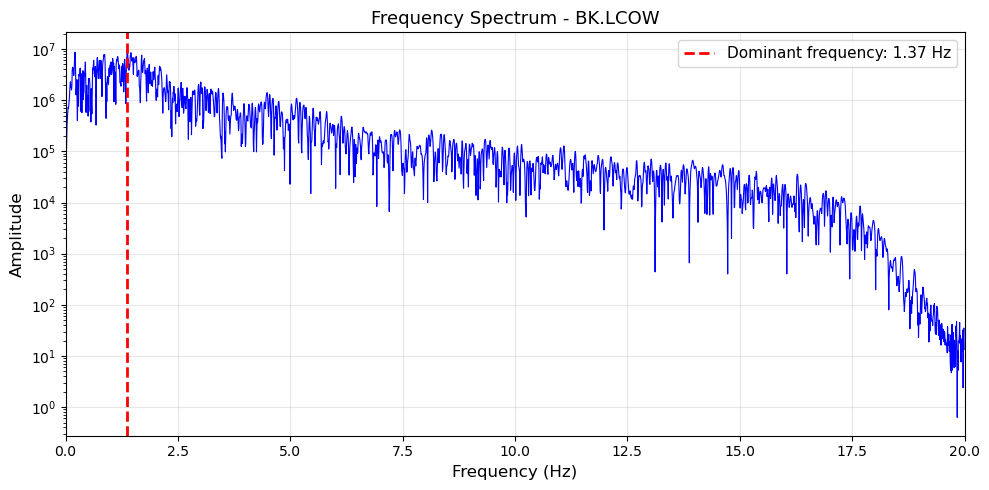

In [27]:
# =============================================================================
# MEASURE WAVE PROPERTIES FROM THE DATA
# =============================================================================
from scipy import fft

tr_analysis = tr_demo.copy()
tr_analysis.detrend('demean')
tr_analysis.taper(max_percentage=0.05)

# Compute frequency spectrum
n = len(tr_analysis.data)
dt = tr_analysis.stats.delta
freq = fft.fftfreq(n, dt)[:n//2]
spectrum = np.abs(fft.fft(tr_analysis.data))[:n//2]

# Find dominant frequency
mask = freq > 0.5
dom_freq = freq[mask][np.argmax(spectrum[mask])]

# Calculate wave properties
period = 1 / dom_freq
omega = 2 * np.pi * dom_freq
lambda_P = Vp_avg / dom_freq
lambda_S = Vs_avg / dom_freq

fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy(freq, spectrum, 'b-', linewidth=0.8)
ax.axvline(x=dom_freq, color='red', linestyle='--', linewidth=2, 
           label=f'Dominant frequency: {dom_freq:.2f} Hz')
ax.set_xlim(0, 20)
ax.set_xlabel('Frequency (Hz)', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_title(f'Frequency Spectrum - {sta_demo["network"]}.{sta_demo["station"]}', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. P and S Wave Energy Distribution

One of the key differences between P-waves and S-waves is the **direction of particle motion**:

- **P-waves**: Particle motion is **parallel** to propagation → energy concentrates in **Vertical (Z)** and **Radial (R)** components
- **S-waves**: Particle motion is **perpendicular** to propagation → energy concentrates in **Transverse (T)** component

To demonstrate this, we download 3-component seismic data and rotate from geographic coordinates (E-N-Z) to the source-receiver coordinate system (R-T-Z) using the back-azimuth.

In [ ]:
# =============================================================================
# DOWNLOAD 3-COMPONENT DATA FOR ENERGY ANALYSIS
# =============================================================================

# Select a station at optimal distance (50-80 km) for clear P and S separation
# Prefer BK network stations which have reliable 3-component data
particle_station = None
for sta in sorted(selected_stations, key=lambda s: abs(s['distance_km'] - 65)):
    if sta['network'] == 'BK' and 50 < sta['distance_km'] < 120:
        particle_station = sta
        break

if particle_station is None:
    for sta in sorted(selected_stations, key=lambda s: abs(s['distance_km'] - 65)):
        if 40 < sta['distance_km'] < 150:
            particle_station = sta
            break

if particle_station is None:
    particle_station = selected_stations[len(selected_stations)//2]

print(f"Selected station: {particle_station['network']}.{particle_station['station']}")
print(f"Epicentral distance: {particle_station['distance_km']:.1f} km")

# Download all 3 components
channel_prefix = particle_station['channel'][:2]

st_3c = client.get_waveforms(
    network=particle_station['network'],
    station=particle_station['station'],
    location="*",
    channel=f"{channel_prefix}?",
    starttime=eq_time - 10,
    endtime=eq_time + 120
)
st_3c.merge(fill_value=0)

print(f"\nDownloaded: {[tr.id for tr in st_3c]}")

In [ ]:
# =============================================================================
# ROTATE TO ZRT (VERTICAL-RADIAL-TRANSVERSE) COORDINATE SYSTEM
# =============================================================================
from obspy.signal.rotate import rotate_ne_rt

# Get station coordinates and earthquake depth
sta_lat = particle_station['latitude']
sta_lon = particle_station['longitude']
eq_depth_km = origin.depth / 1000  # Convert m to km

# Calculate epicentral distance and back-azimuth
dist_m, azimuth, back_azimuth = gps2dist_azimuth(eq_lat, eq_lon, sta_lat, sta_lon)
epicentral_dist_km = dist_m / 1000

# Calculate HYPOCENTRAL distance (accounts for earthquake depth)
hypocentral_dist_km = np.sqrt(epicentral_dist_km**2 + eq_depth_km**2)

print(f"Earthquake: {eq_lat:.3f}°N, {eq_lon:.3f}°E, Depth: {eq_depth_km:.1f} km")
print(f"Station: {sta_lat:.3f}°N, {sta_lon:.3f}°E")
print(f"Epicentral distance: {epicentral_dist_km:.1f} km")
print(f"Hypocentral distance: {hypocentral_dist_km:.1f} km")
print(f"Back-azimuth: {back_azimuth:.1f}°")

# Pre-process: detrend and filter
st_3c_proc = st_3c.copy()
st_3c_proc.detrend('demean')
st_3c_proc.taper(max_percentage=0.05)
st_3c_proc.filter('bandpass', freqmin=1, freqmax=10)

# Extract the three components
try:
    tr_z = st_3c_proc.select(component='Z')[0]
    tr_n = st_3c_proc.select(component='N')[0]
    tr_e = st_3c_proc.select(component='E')[0]
except:
    tr_z = st_3c_proc.select(component='Z')[0]
    tr_n = st_3c_proc.select(component='1')[0] if st_3c_proc.select(component='1') else st_3c_proc.select(component='N')[0]
    tr_e = st_3c_proc.select(component='2')[0] if st_3c_proc.select(component='2') else st_3c_proc.select(component='E')[0]

# Rotate NE to RT using back-azimuth
radial, transverse = rotate_ne_rt(tr_n.data, tr_e.data, back_azimuth)
vertical = tr_z.data

print(f"\nRotated to ZRT coordinate system")

In [ ]:
# =============================================================================
# 3-COMPONENT WAVEFORMS WITH P AND S WAVE WINDOWS
# =============================================================================

# Time array and expected arrivals using HYPOCENTRAL distance
times = tr_z.times() + (tr_z.stats.starttime - eq_time)

# Use hypocentral distance for travel times
t_P = hypocentral_dist_km / Vp_avg
t_S = hypocentral_dist_km / Vs_avg

print(f"Hypocentral distance: {hypocentral_dist_km:.1f} km (epicentral: {epicentral_dist_km:.1f} km, depth: {eq_depth_km:.1f} km)")
print(f"Expected P arrival: {t_P:.1f} s, S arrival: {t_S:.1f} s")

# Define TIGHT time windows to isolate P and S energy
# P window: capture just the first arrival (before S contamination)
# S window: start after P coda dies down
P_window = (t_P - 0.5, t_P + 2)  # Short window for P
S_window = (t_S - 0.5, t_S + 3)  # Window for S

fig, axes = plt.subplots(3, 1, figsize=(14, 7), sharex=True)

components = [
    (vertical, 'Z (Vertical)', 'black'),
    (radial, 'R (Radial)', 'blue'),
    (transverse, 'T (Transverse)', 'green')
]

for ax, (data, label, color) in zip(axes, components):
    ax.plot(times, data, color=color, linewidth=0.7)
    ax.axvline(x=t_P, color='blue', linestyle='--', linewidth=2, alpha=0.7)
    ax.axvline(x=t_S, color='red', linestyle='--', linewidth=2, alpha=0.7)
    ax.axvspan(P_window[0], P_window[1], alpha=0.2, color='blue')
    ax.axvspan(S_window[0], S_window[1], alpha=0.2, color='red')
    ax.set_ylabel(label, fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-5, 50)

axes[0].text(t_P + 0.3, axes[0].get_ylim()[1] * 0.8, 'P', color='blue', fontsize=12, fontweight='bold')
axes[0].text(t_S + 0.3, axes[0].get_ylim()[1] * 0.8, 'S', color='red', fontsize=12, fontweight='bold')
axes[-1].set_xlabel('Time since origin (s)', fontsize=12)

fig.suptitle(f"{particle_station['network']}.{particle_station['station']} - Hypocentral dist: {hypocentral_dist_km:.1f} km", fontsize=12)
plt.tight_layout()
plt.show()

print("\nLook for:")
print("  P-wave window (blue): Strong energy on Z and R, weak on T")
print("  S-wave window (red): Strong energy on T")

In [ ]:
# =============================================================================
# ENERGY DISTRIBUTION: WHICH DIRECTION HAS THE STRONGEST ENERGY?
# =============================================================================

# Get sample indices for P and S windows
dt = tr_z.stats.delta
P_idx_start = max(0, int((P_window[0] - times[0]) / dt))
P_idx_end = min(len(vertical), int((P_window[1] - times[0]) / dt))
S_idx_start = max(0, int((S_window[0] - times[0]) / dt))
S_idx_end = min(len(vertical), int((S_window[1] - times[0]) / dt))

# Extract data for P and S windows
Z_P, R_P, T_P = vertical[P_idx_start:P_idx_end], radial[P_idx_start:P_idx_end], transverse[P_idx_start:P_idx_end]
Z_S, R_S, T_S = vertical[S_idx_start:S_idx_end], radial[S_idx_start:S_idx_end], transverse[S_idx_start:S_idx_end]

# Calculate energy (sum of squared amplitudes) for each component
energy_P = np.array([np.sum(Z_P**2), np.sum(R_P**2), np.sum(T_P**2)])
energy_S = np.array([np.sum(Z_S**2), np.sum(R_S**2), np.sum(T_S**2)])

# Normalize to percentages
pct_P = energy_P / energy_P.sum() * 100
pct_S = energy_S / energy_S.sum() * 100

# Create bar chart
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
components = ['Z\n(Vertical)', 'R\n(Radial)', 'T\n(Transverse)']
x = np.arange(len(components))

# P-wave
ax = axes[0]
bars = ax.bar(x, pct_P, 0.6, color=['steelblue', 'royalblue', 'lightsteelblue'], edgecolor='black')
ax.set_ylabel('Energy (%)', fontsize=11)
ax.set_title('P-wave Energy', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(components)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3, axis='y')
for bar, pct in zip(bars, pct_P):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{pct:.0f}%', ha='center', fontsize=11, fontweight='bold')

# S-wave
ax = axes[1]
bars = ax.bar(x, pct_S, 0.6, color=['salmon', 'lightcoral', 'indianred'], edgecolor='black')
ax.set_ylabel('Energy (%)', fontsize=11)
ax.set_title('S-wave Energy', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(components)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3, axis='y')
for bar, pct in zip(bars, pct_S):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{pct:.0f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Analysis
print("=" * 55)
print("RESULTS")
print("=" * 55)
print(f"P-wave: Z={pct_P[0]:.0f}%, R={pct_P[1]:.0f}%, T={pct_P[2]:.0f}%")
print(f"S-wave: Z={pct_S[0]:.0f}%, R={pct_S[1]:.0f}%, T={pct_S[2]:.0f}%")

# Check if pattern matches theory
p_in_zr = pct_P[0] + pct_P[1]  # P energy in Z+R
s_in_t = pct_S[2]               # S energy in T

print(f"\nP-wave energy in Z+R plane: {p_in_zr:.0f}%")
print(f"S-wave energy in T direction: {s_in_t:.0f}%")

print("\n" + "=" * 55)
print("EXPECTED PATTERN (theory)")
print("=" * 55)
print("P-wave: Most energy in Z and R (parallel to propagation)")
print("S-wave: Most energy in T (perpendicular to propagation)")
print("\nNote: Pattern clarity depends on earthquake focal mechanism,")
print("      depth, distance, and local structure.")

## Summary

In this notebook, we learned:

1. **The Elastic Wave Equation** describes how seismic waves propagate through Earth materials, governed by density ($\rho$) and elastic moduli ($\lambda$, $\mu$).

2. **P-waves** are compressional waves with velocity $V_P = \sqrt{(\lambda + 2\mu)/\rho}$ — they travel faster and arrive first.

3. **S-waves** are shear waves with velocity $V_S = \sqrt{\mu/\rho}$ — they travel slower and arrive second.

4. **The 1D wave equation** $\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$ has harmonic solutions $u = A\cos(kx - \omega t)$.

5. **Key wave properties** are interconnected by $c = f\lambda = \omega/k$:
   - Frequency ($f$) and period ($T = 1/f$)
   - Angular frequency ($\omega = 2\pi f$)
   - Wavelength ($\lambda$) and wave number ($k = 2\pi/\lambda$)

6. **Real earthquake data** demonstrates:
   - P-waves arrive before S-waves at all distances
   - The S-P time interval increases linearly with distance
   - Travel time calculations should use **hypocentral distance** (accounting for earthquake depth)

7. **Energy distribution analysis** confirms the fundamental difference between P and S waves:
   - **P-waves**: Energy concentrates in **Z (Vertical)** and **R (Radial)** components — motion parallel to propagation
   - **S-waves**: Energy concentrates in **T (Transverse)** component — motion perpendicular to propagation